<a href="https://colab.research.google.com/github/danielmrios/Methodologies-of-Data-Science/blob/main/Education_Data_Preparation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Introduction

Exploring the impact of socioeconomic variables on test scores. This notebook involves prepping the data for analysis & modeling.

## Import libraries

In [458]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme(style='whitegrid')
import missingno as msno

# Train-test splits
from sklearn.model_selection import train_test_split

# Model preprocessing
from sklearn.preprocessing import StandardScaler

# Imputation
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import SimpleImputer, IterativeImputer, KNNImputer

## The data

This project utilizes two data sets. The primary data set is the EdGap data set from [EdGap.org](https://www.edgap.org/#5/37.875/-96.987). This data set from 2016 includes information about average ACT or SAT scores for schools and several socioeconomic characteristics of the school district. The secondary data set is basic information about each school from the [National Center for Education Statistics](https://nces.ed.gov/ccd/pubschuniv.asp).





### EdGap data

All socioeconomic data (household income, unemployment, adult educational attainment, and family structure) are from the Census Bureau's American Community Survey.

[EdGap.org](https://www.edgap.org/#5/37.875/-96.987) report that ACT and SAT score data is from each state's department of education or some other public data release. The nature of the other public data release is not known.

The quality of the census data and the department of education data can be assumed to be reasonably high.

[EdGap.org](https://www.edgap.org/#5/37.875/-96.987) do not indicate that they processed the data in any way. The data were assembled by the [EdGap.org](https://www.edgap.org/#5/37.875/-96.987) team, so there is always the possibility for human error. Given the public nature of the data, we would be able to consult the original data sources to check the quality of the data if we had any questions.

### School information data

The school information data is from the [National Center for Education Statistics](https://nces.ed.gov/ccd/pubschuniv.asp). This data set consists of basic identifying information about schools and can be assumed to be of reasonably high quality. As for the EdGap.org data, the school information data is public, so we would be able to consult the original data sources to check the quality of the data if we had any questions.


## Load the data

Load the EdGap
 data set, load ZIP in as a string so it isn't treated as a number

In [459]:
edgap = pd.read_excel('https://github.com/galenegan/DATA-3320/raw/main/education/EdGap_data.xlsx', dtype={'MZIP': 'str'})

/usr/local/lib/python3.10/dist-packages/openpyxl/worksheet/_reader.py:329: UserWarning: Unknown extension is not supported and will be removed
  warn(msg)


Load the school information data

In [460]:
!wget -O school_info.csv https://drive.usercontent.google.com/u/0/uc?id=1HvW2w-o2XZzCm4KTvnb1Bb3BvoAa14BP&export=download

--2024-04-23 10:16:19--  https://drive.usercontent.google.com/u/0/uc?id=1HvW2w-o2XZzCm4KTvnb1Bb3BvoAa14BP
Resolving drive.usercontent.google.com (drive.usercontent.google.com)... 142.251.163.132, 2607:f8b0:4004:c1b::84
Connecting to drive.usercontent.google.com (drive.usercontent.google.com)|142.251.163.132|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://drive.usercontent.google.com/uc?id=1HvW2w-o2XZzCm4KTvnb1Bb3BvoAa14BP [following]
--2024-04-23 10:16:19--  https://drive.usercontent.google.com/uc?id=1HvW2w-o2XZzCm4KTvnb1Bb3BvoAa14BP
Reusing existing connection to drive.usercontent.google.com:443.
HTTP request sent, awaiting response... 303 See Other
Location: https://drive.usercontent.google.com/download?id=1HvW2w-o2XZzCm4KTvnb1Bb3BvoAa14BP [following]
--2024-04-23 10:16:19--  https://drive.usercontent.google.com/download?id=1HvW2w-o2XZzCm4KTvnb1Bb3BvoAa14BP
Reusing existing connection to drive.usercontent.google.com:443.
HTTP request sent, await

In [461]:
school_info = pd.read_csv('school_info.csv', encoding= 'unicode_escape', dtype={'MZIP': 'str'})

<ipython-input-461-dc6eeef43c8f>:1: DtypeWarning: Columns (6,9,14,15,19,21,22,25,26,29,31,35,39,41,42) have mixed types. Specify dtype option on import or set low_memory=False.
  school_info = pd.read_csv('school_info.csv', encoding= 'unicode_escape', dtype={'MZIP': 'str'})


## Explore the contents of the data sets

In [462]:
edgap.head()

,NCESSCH School ID,CT Unemployment Rate,CT Pct Adults with College Degree,CT Pct Childre In Married Couple Family,CT Median Household Income,School ACT average (or equivalent if SAT score),School Pct Free and Reduced Lunch
0,100001600143,0.117962,0.445283,0.346495,42820.0,20.433455,0.066901
1,100008000024,0.063984,0.662765,0.767619,89320.0,19.498168,0.112412
2,100008000225,0.056460,0.701864,0.713090,84140.0,19.554335,0.096816
3,100017000029,0.044739,0.692062,0.641283,56500.0,17.737485,0.296960
4,100018000040,0.077014,0.640060,0.834402,54015.0,18.245421,0.262641


Looks like we have school ID's, their test scores, percentage of students using free & reduced lunch and corresponding information on county unemployment, adults with a college degree, percent of children with married parents, median income

In [463]:
school_info.head()

,SCHOOL_YEAR,FIPST,STATENAME,ST,SCH_NAME,LEA_NAME,STATE_AGENCY_NO,UNION,ST_LEAID,LEAID,...,G_10_OFFERED,G_11_OFFERED,G_12_OFFERED,G_13_OFFERED,G_UG_OFFERED,G_AE_OFFERED,GSLO,GSHI,LEVEL,IGOFFERED
0,2016-2017,1,ALABAMA,AL,Sequoyah Sch - Chalkville Campus,Alabama Youth Services,1,NaN,AL-210,100002,...,Yes,Yes,Yes,No,No,No,07,12,High,As reported
1,2016-2017,1,ALABAMA,AL,Camps,Alabama Youth Services,1,NaN,AL-210,100002,...,Yes,Yes,Yes,No,No,No,07,12,High,As reported
2,2016-2017,1,ALABAMA,AL,Det Ctr,Alabama Youth Services,1,NaN,AL-210,100002,...,Yes,Yes,Yes,No,No,No,07,12,High,As reported
3,2016-2017,1,ALABAMA,AL,Wallace Sch - Mt Meigs Campus,Alabama Youth Services,1,NaN,AL-210,100002,...,Yes,Yes,Yes,No,No,No,07,12,High,As reported
4,2016-2017,1,ALABAMA,AL,McNeel Sch - Vacca Campus,Alabama Youth Services,1,NaN,AL-210,100002,...,Yes,Yes,Yes,No,No,No,07,12,High,As reported


For the school dataset we have info on school year, name, grades offered. This could be used with the edgap data to further examine characteristics between schools.

##### $\rightarrow$ Look at some distrubutions.

In [464]:
edgap.describe()

,NCESSCH School ID,CT Unemployment Rate,CT Pct Adults with College Degree,CT Pct Childre In Married Couple Family,CT Median Household Income,School ACT average (or equivalent if SAT score),School Pct Free and Reduced Lunch
count,7.986000e+03,7972.000000,7973.000000,7961.000000,7966.000000,7986.000000,7986.000000
mean,3.321869e+11,0.098730,0.568930,0.633440,52026.905222,20.181532,0.420651
std,1.323638e+11,0.058959,0.165704,0.196764,24228.057079,2.595201,0.239754
min,1.000016e+11,0.000000,0.091493,0.000000,3589.000000,-3.070818,-0.054545
25%,2.105340e+11,0.058655,0.450828,0.523810,36597.250000,18.600000,0.238501
50%,3.600085e+11,0.085649,0.554979,0.667594,46833.500000,20.400000,0.381570
75%,4.226678e+11,0.123376,0.676571,0.777135,61369.250000,21.910867,0.575447
max,5.605830e+11,0.590278,1.000000,1.000000,226181.000000,32.362637,0.998729


##### $\rightarrow$ Look at data types & null values

In [465]:
edgap.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7986 entries, 0 to 7985
Data columns (total 7 columns):
 #   Column                                           Non-Null Count  Dtype  
---  ------                                           --------------  -----  
 0   NCESSCH School ID                                7986 non-null   int64  
 1   CT Unemployment Rate                             7972 non-null   float64
 2   CT Pct Adults with College Degree                7973 non-null   float64
 3   CT Pct Childre In Married Couple Family          7961 non-null   float64
 4   CT Median Household Income                       7966 non-null   float64
 5   School ACT average (or equivalent if SAT score)  7986 non-null   float64
 6   School Pct Free and Reduced Lunch                7986 non-null   float64
dtypes: float64(6), int64(1)
memory usage: 436.9 KB


In [466]:
school_info.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 102183 entries, 0 to 102182
Data columns (total 65 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   SCHOOL_YEAR          102183 non-null  object 
 1   FIPST                102183 non-null  int64  
 2   STATENAME            102183 non-null  object 
 3   ST                   102183 non-null  object 
 4   SCH_NAME             102183 non-null  object 
 5   LEA_NAME             102183 non-null  object 
 6   STATE_AGENCY_NO      102183 non-null  object 
 7   UNION                2533 non-null    float64
 8   ST_LEAID             102183 non-null  object 
 9   LEAID                102183 non-null  object 
 10  ST_SCHID             102183 non-null  object 
 11  NCESSCH              102181 non-null  float64
 12  SCHID                102181 non-null  float64
 13  MSTREET1             102181 non-null  object 
 14  MSTREET2             1825 non-null    object 
 15  MSTREET3         

There are a lot more rows in the school dataset. Considering the size of the edgap datset, we can assume it doesn't contain a lot of these schools. It looks like it'd be best to join the two datasets on the 'NCESSCH' school identifier ('NCESSCH School ID' in the edgap data).

Some of them also have a lot of null's, but as mentioned, with the goal of joining the two dataframes, a lot of these won't be needed.


I'd be interested in seeing if the school dataset includes multiple years, 102,000 entries seems like a lot for 2016-17

In [467]:
unique_school_years = school_info['SCHOOL_YEAR'].unique()

unique_school_years

array(['2016-2017', 'hswebb\\index.htm', 'ces\\index.html'], dtype=object)

Looks like it is, plus a few values we'll probably have to omit later.

## Convert data types, if necessary

##### $\rightarrow$ For starters, we'll remove any rows in the school dataset that have a null value in NCESSCH. There aren't any null NCESSCH values in the edgap so we don't have to worry about that.

In [468]:
school_info = school_info[school_info['NCESSCH'].isna() == False]

In [469]:
# double check
school_info.info()

<class 'pandas.core.frame.DataFrame'>
Index: 102181 entries, 0 to 102182
Data columns (total 65 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   SCHOOL_YEAR          102181 non-null  object 
 1   FIPST                102181 non-null  int64  
 2   STATENAME            102181 non-null  object 
 3   ST                   102181 non-null  object 
 4   SCH_NAME             102181 non-null  object 
 5   LEA_NAME             102181 non-null  object 
 6   STATE_AGENCY_NO      102181 non-null  object 
 7   UNION                2531 non-null    float64
 8   ST_LEAID             102181 non-null  object 
 9   LEAID                102181 non-null  object 
 10  ST_SCHID             102181 non-null  object 
 11  NCESSCH              102181 non-null  float64
 12  SCHID                102181 non-null  float64
 13  MSTREET1             102181 non-null  object 
 14  MSTREET2             1825 non-null    object 
 15  MSTREET3             2

Looks good

## Are the data suitable for answering the question?

Is there's any relationship between socioeconomic variables and ACT score (target variable)?

##### $\rightarrow$ Lets make a pair plot to quickly explore if there exist any relationships between variables.

In [470]:
edgap.columns

Index(['NCESSCH School ID', 'CT Unemployment Rate',
       'CT Pct Adults with College Degree',
       'CT Pct Childre In Married Couple Family', 'CT Median Household Income',
       'School ACT average (or equivalent if SAT score)',
       'School Pct Free and Reduced Lunch'],
      dtype='object')

In [471]:
edgap.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7986 entries, 0 to 7985
Data columns (total 7 columns):
 #   Column                                           Non-Null Count  Dtype  
---  ------                                           --------------  -----  
 0   NCESSCH School ID                                7986 non-null   int64  
 1   CT Unemployment Rate                             7972 non-null   float64
 2   CT Pct Adults with College Degree                7973 non-null   float64
 3   CT Pct Childre In Married Couple Family          7961 non-null   float64
 4   CT Median Household Income                       7966 non-null   float64
 5   School ACT average (or equivalent if SAT score)  7986 non-null   float64
 6   School Pct Free and Reduced Lunch                7986 non-null   float64
dtypes: float64(6), int64(1)
memory usage: 436.9 KB


Making this the first time a few outliers became evident, so we'll omit ACT values lower than 5

In [472]:
edgap = edgap.loc[edgap["School ACT average (or equivalent if SAT score)"] > 5]

<Figure size 1000x1000 with 0 Axes>

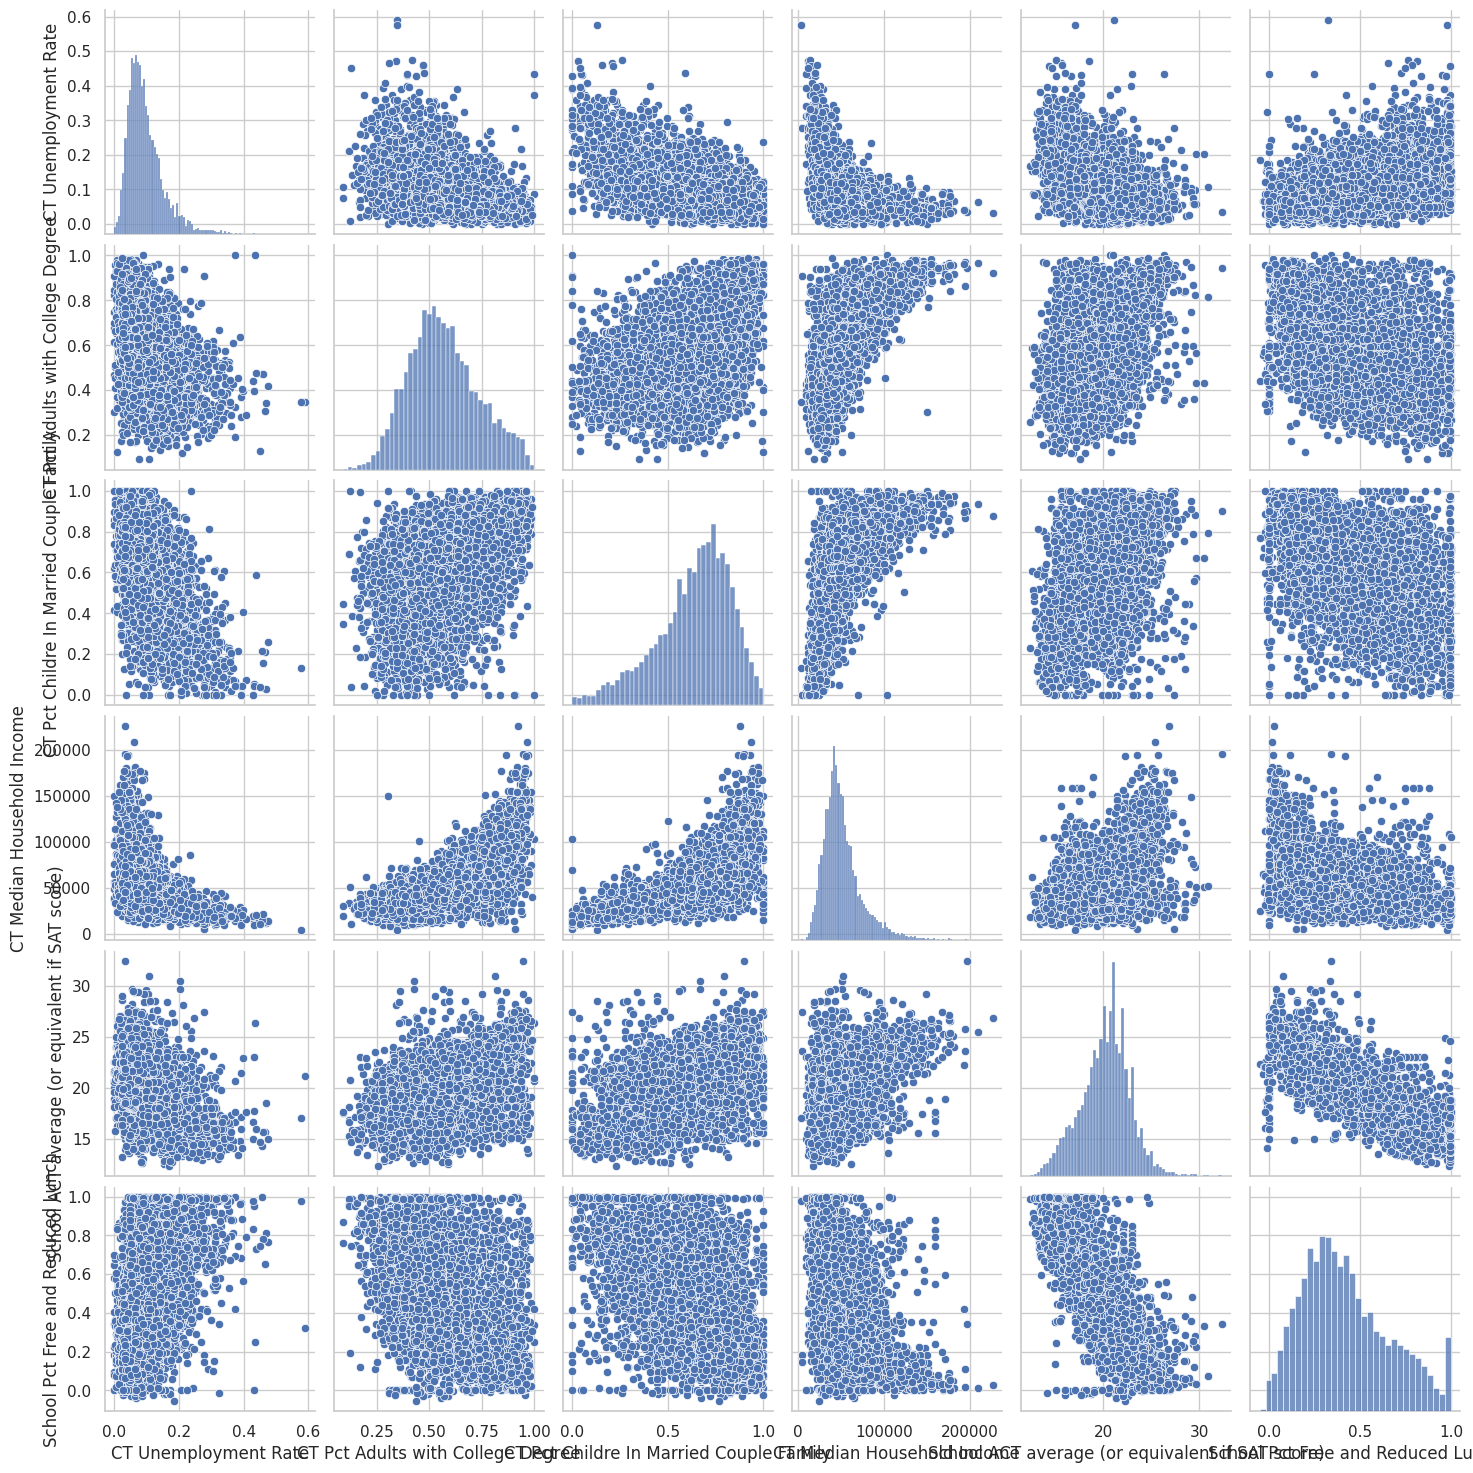

In [473]:
fig = plt.figure()
sns.pairplot(edgap.drop(columns = 'NCESSCH School ID'))
fig.set_size_inches(10, 10)

Looks like a number of socieconomic variables have a relationship with ACT score. We can also see a number of outliers that'll need to be explored further.

## Remove unnecessary parts

##### $\rightarrow$ Checking for duplicate columns and duplicate school ID's

In [474]:
duplicates_edgap = edgap.duplicated()
duplicates_edgap.sum()

0

In [475]:
# Checking for duplicate values specifically in the 'NCESSCH School ID' column
duplicates_edgap_school = edgap.duplicated(subset=['NCESSCH School ID'])

duplicates_edgap_school.sum()

0

In [476]:
duplicates_school = school_info.duplicated()
duplicates_school.sum()

0

In [477]:
duplicates_school_info = school_info.duplicated(subset=['NCESSCH'])

duplicates_school_info.sum()

0

Looks good

## Select relevant subsets of the data

The school information data set contains a lot of information. We only need the year, school identity, location, and school type information.

Keep the columns `SCHOOL_YEAR`, `NCESSCH`, `MSTATE`, `MZIP`, `SCH_TYPE_TEXT`, `LEVEL`

In [478]:
school_info = school_info[['SCHOOL_YEAR', 'NCESSCH', 'MSTATE', 'MZIP', 'SCH_TYPE_TEXT', 'LEVEL']]

In [479]:
school_info.head()

,SCHOOL_YEAR,NCESSCH,MSTATE,MZIP,SCH_TYPE_TEXT,LEVEL
0,2016-2017,1.000020e+10,AL,35220,Alternative School,High
1,2016-2017,1.000020e+10,AL,36057,Alternative School,High
2,2016-2017,1.000020e+10,AL,36057,Alternative School,High
3,2016-2017,1.000020e+10,AL,36057,Alternative School,High
4,2016-2017,1.000020e+10,AL,35206,Alternative School,High


## Rename columns

This'll help tidy up the data set

In [480]:
edgap = edgap.rename(columns={"NCESSCH School ID":"id",
              "CT Pct Adults with College Degree":"percent_college",
              "CT Unemployment Rate":"rate_unemployment",
              "CT Pct Childre In Married Couple Family":"percent_married",
              "CT Median Household Income":"median_income",
              "School ACT average (or equivalent if SAT score)":"average_act",
              "School Pct Free and Reduced Lunch":"percent_lunch"})

Rename the columns `SCHOOL_YEAR`, `NCESSCH`, `MSTATE`, `MZIP`, `SCH_TYPE_TEXT`, `LEVEL` to `year`, `id`, `state`, `zip_code`, `school_type`, `school_level`

In [481]:
school_info = school_info.rename(columns={'SCHOOL_YEAR':'year',
                                          'NCESSCH':'id',
                                          'MSTATE':'state',
                                          'MZIP':'zip_code',
                                          'SCH_TYPE_TEXT':'school_type',
                                          'LEVEL':'school_level'})

In [482]:
edgap.head()

,id,rate_unemployment,percent_college,percent_married,median_income,average_act,percent_lunch
0,100001600143,0.117962,0.445283,0.346495,42820.0,20.433455,0.066901
1,100008000024,0.063984,0.662765,0.767619,89320.0,19.498168,0.112412
2,100008000225,0.056460,0.701864,0.713090,84140.0,19.554335,0.096816
3,100017000029,0.044739,0.692062,0.641283,56500.0,17.737485,0.296960
4,100018000040,0.077014,0.640060,0.834402,54015.0,18.245421,0.262641


In [483]:
school_info.head()

,year,id,state,zip_code,school_type,school_level
0,2016-2017,1.000020e+10,AL,35220,Alternative School,High
1,2016-2017,1.000020e+10,AL,36057,Alternative School,High
2,2016-2017,1.000020e+10,AL,36057,Alternative School,High
3,2016-2017,1.000020e+10,AL,36057,Alternative School,High
4,2016-2017,1.000020e+10,AL,35206,Alternative School,High


## Join data frames

Join on 'id', keeping all the edgap data and merging with corresponding school_info data

In [484]:
df = edgap.merge(school_info, how = 'left', on='id')

In [485]:
df.head()

,id,rate_unemployment,percent_college,percent_married,median_income,average_act,percent_lunch,year,state,zip_code,school_type,school_level
0,100001600143,0.117962,0.445283,0.346495,42820.0,20.433455,0.066901,2016-2017,DE,19804,Regular School,High
1,100008000024,0.063984,0.662765,0.767619,89320.0,19.498168,0.112412,2016-2017,DE,19709,Regular School,High
2,100008000225,0.056460,0.701864,0.713090,84140.0,19.554335,0.096816,2016-2017,DE,19709,Regular School,High
3,100017000029,0.044739,0.692062,0.641283,56500.0,17.737485,0.296960,2016-2017,DE,19958,Regular School,High
4,100018000040,0.077014,0.640060,0.834402,54015.0,18.245421,0.262641,2016-2017,DE,19934,Regular School,High


In [486]:
df.shape

(7983, 12)

## Quality Control

Check for out-of-range values or values that do not match what we want to analyze. Either set values to `NaN` or remove the observations, as appropriate.

##### $\rightarrow$ Let's start by making sure all the school levels are "High"

In [487]:
# find unique values
unique_school_levels = df['school_level'].unique()

print("Unique values in the 'school_level' column:")
print(unique_school_levels)

Unique values in the 'school_level' column:
['High' 'Other' 'Not reported' nan 'Elementary']


Remove them

In [488]:
df = df[df['school_level'] == 'High']

##### $\rightarrow$ Now let's make sure there are no impossible values in columns

In [489]:
# Count values less than 0 and greater than 1 for the percentages, and less than zero for ACT and Income
count_u = ((df['rate_unemployment'] < 0) | (df['rate_unemployment'] > 1)).sum()
count_c = ((df['percent_college'] < 0) | (df['percent_college'] > 1)).sum()
count_m = ((df['percent_married'] < 0) | (df['percent_married'] > 1)).sum()
count_i = (df['median_income'] < 0).sum()
count_a = (df['average_act'] < 0).sum()
count_l = ((df['percent_lunch'] < 0) | (df['percent_lunch'] > 1)).sum()

# print the values
print(f'u {count_u}')
print(f'c {count_c}')
print(f'm {count_m}')
print(f'i {count_i}')
print(f'a {count_a}')
print(f'l {count_l}')

u 0
c 0
m 0
i 0
a 0
l 20


percent_lunch is the only column that has incorrect values, we'll remove these.

In [490]:
df = df[(df['percent_lunch'] >= 0) & (df['percent_lunch'] <= 1)]

count_l = ((df['percent_lunch'] < 0) | (df['percent_lunch'] > 1)).sum()
print(f'l {count_l}')

l 0


##### $\rightarrow$ Remove any school year's not '2016-2017', we saw earlier that there were few inconsistencies.

In [491]:
df = df[df['year'] == '2016-2017']

##### $\rightarrow$ Removing impossible values isn't quite enough to be sure everything matches. Next, let's go through each of the explanatory variables and see the distribution of values to identify any unusual outliers.

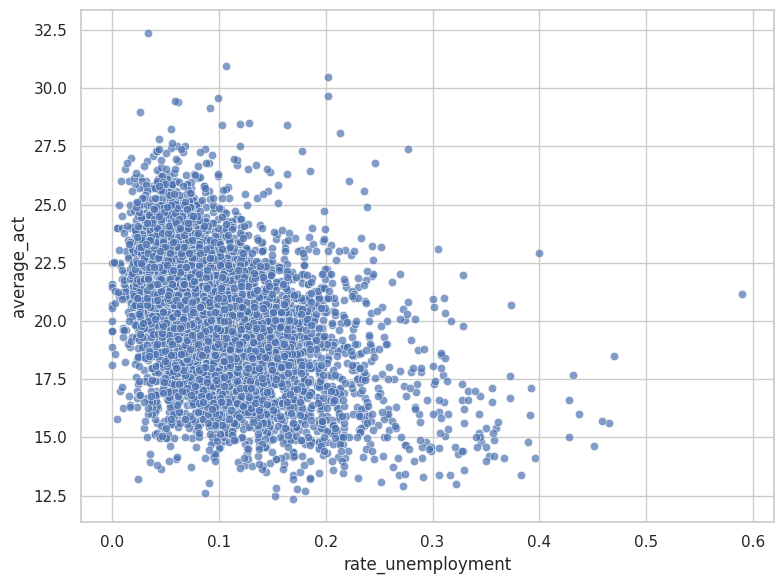

In [492]:
plt.figure(figsize=(8, 6))
sns.scatterplot(data=df, x='rate_unemployment', y='average_act', alpha=0.7)
plt.tight_layout()
plt.show()

There are a couple noticably high outliers in unemployment rate, let's investigate if these are accurate

In [493]:
# sorting the DataFrame by 'rate_unemployment' in descending order
sorted_df = df.sort_values(by='rate_unemployment', ascending=False)

# selecting top 3 schools with the highest unemployment rate
top_unemployment = sorted_df.head(3)

print(top_unemployment[['id', 'rate_unemployment', 'zip_code']])

                id  rate_unemployment zip_code
2418  250642000930           0.590278    02045
1067  170993006055           0.470219    60609
2355  250309002652           0.465710    02301


The highest unemployment rate is in Hull, Massachusetts. A simple search using unitedstateszipcodes.org showed an unemployment rate of 4.6% and a 100k+ household income, we can assume this isn't accurate. We'll remove this record.

The second highest is Maritime Academy of Toledo in Toledo, OH. 57% of the ZIP's population lives below the poverty line, this could be correct.

In [494]:
df = df.drop(index=2418)

##### $\rightarrow$  Next, let's look at percent of adults with a college degree

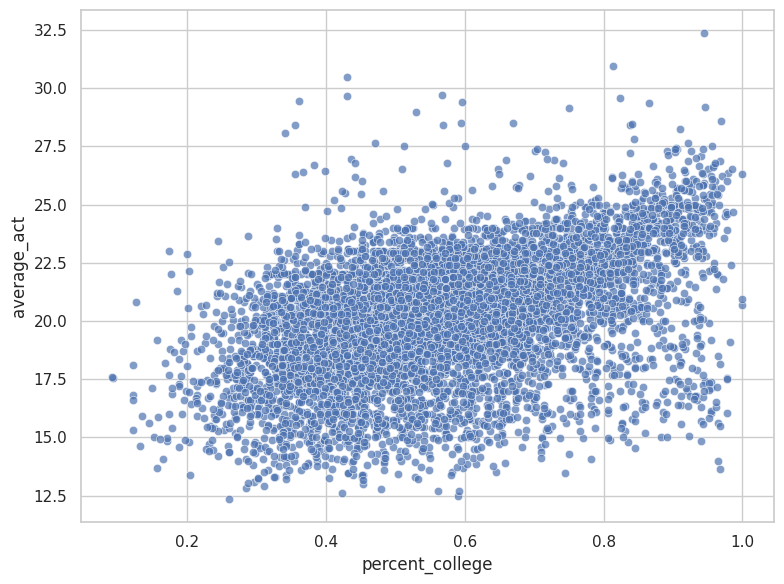

In [495]:
plt.figure(figsize=(8, 6))
sns.scatterplot(data=edgap, x='percent_college', y='average_act', alpha=0.7)
plt.tight_layout()
plt.show()

There look to be a couple low outliers, and 3 high outliers at 100%.

Let's investigate

In [496]:
sorted_df = df.sort_values(by='percent_college', ascending=False)

top_college = sorted_df.head(5)

print(top_college[['id', 'percent_college', 'zip_code']])

                id  percent_college zip_code
2592  260018601543         1.000000    49307
3632  340606000122         1.000000    08205
7736  550852000967         0.986949    53726
6640  481776001549         0.985338    78746
1020  170993001185         0.983493    60614


Crossroads charter academy is in Big Rapids Michigan, using unitedstateszipcodes.org it looks like 50% of the population only held a high school diploma. We can assume this is incorrect.

8205 (Township in southern New Jersey) saw similar rates, so unlikely to see every adult hold a college degree. We'll omit these records.

In [497]:
college_drop = [2592, 3632]  # Indices to drop

df = df.drop(college_drop)

Now let's look at the few low outliers

In [498]:
sorted_df = df.sort_values(by='percent_college', ascending=True)

bottom_college = sorted_df.head(5)

print(bottom_college[['id', 'percent_college', 'zip_code']])

                id  percent_college zip_code
6366  480771000057         0.091493    77037
106   120033000355         0.093122    34142
1058  170993005795         0.120885    60623
1052  170993005788         0.120885    60623
1057  170993005794         0.120885    60623


More than 50% of 77037's population has less than a high school diploma, and only 3% held a bachelor's degree. 34142 also saw a similar spread. These don't look unreasonable to be on the lower end of educational attainment.

##### $\rightarrow$ Now let's look at percent of children in a married couple family.

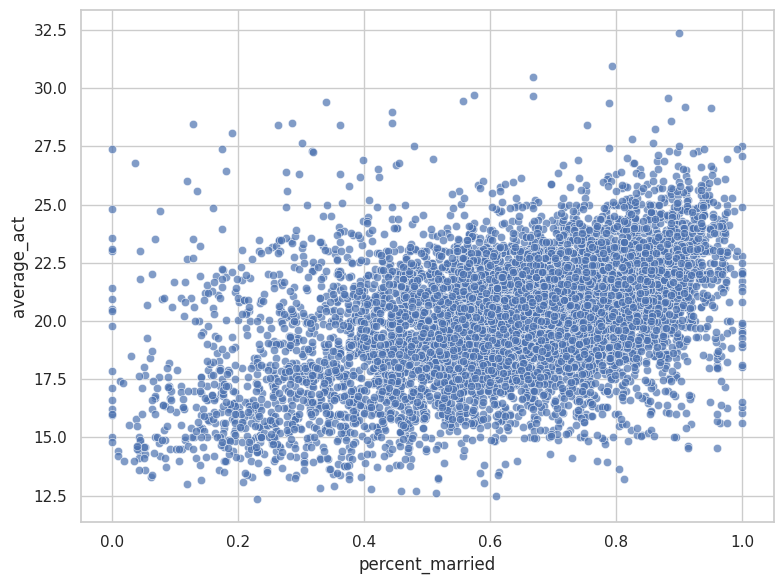

In [499]:
plt.figure(figsize=(8, 6))
sns.scatterplot(data=edgap, x='percent_married', y='average_act', alpha=0.7)
plt.tight_layout()
plt.show()

There don't appear to be a lot of significant outliers here, but lets take a look at a couple of the 0% to be sure.

In [500]:
sorted_df = df.sort_values(by='percent_married', ascending=True)

bottom_married = sorted_df.head(5)

print(bottom_married[['id', 'percent_married', 'zip_code']])

                id  percent_married zip_code
1059  170993005884              0.0    60621
6038  470014802179              0.0    38107
1459  180004102348              0.0    47306
1915  210299000730              0.0    40203
1946  210372001486              0.0    40475


47306 is a college town to Ball State University. On unitedstateszipcodes 38126 has 8% of the population in a 2 parent household, and 75202 has 49 households with kids.

None of these seem fairly outlandish, nor are they significant outliers in the distribution.

##### $\rightarrow$ Next we'll look at median household income

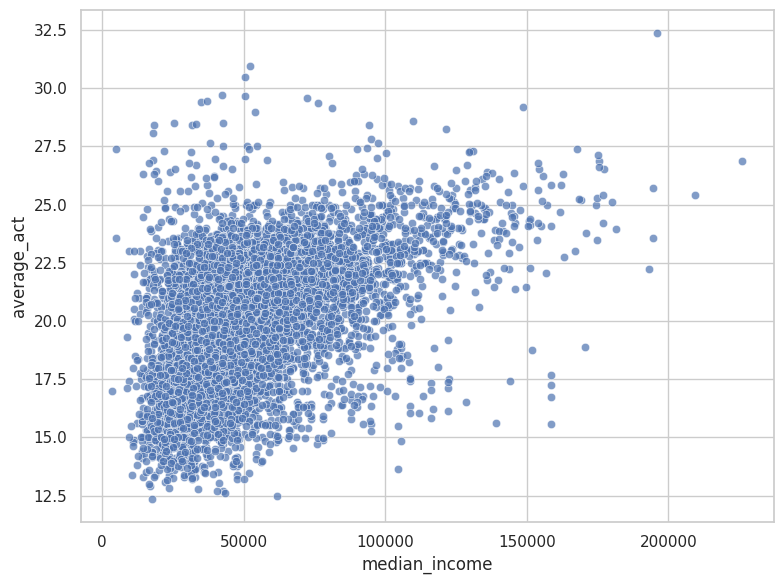

In [501]:
plt.figure(figsize=(8, 6))
sns.scatterplot(data=edgap, x='median_income', y='average_act', alpha=0.7)
plt.tight_layout()
plt.show()

There are a handful of noticable outliers in household income, these should be fairly simple to cross-reference.

In [502]:
sorted_df = df.sort_values(by='median_income', ascending=False)

top_income = sorted_df.head(5)

print(top_income[['id', 'median_income', 'zip_code']])

                id  median_income zip_code
2547  251275002087       226181.0    02493
6497  481302000791       209342.0    76092
3909  360007702877       196027.0    10282
3863  341746002462       194536.0    07006
3332  291782000946       194485.0    63124


All of these are wealthy ZIP's, so it checks out.

Let's look at the low outliers

In [503]:
sorted_df = df.sort_values(by='median_income', ascending=True)

low_income = sorted_df.head(5)

print(low_income[['id', 'median_income', 'zip_code']])

                id  median_income zip_code
1459  180004102348         4833.0    47306
1915  210299000730         9003.0    40203
4755  390437800481         9435.0    44115
1077  170993006132         9500.0    60616
6809  482364002619        10945.0    77051


We already observed 43604 and 47306 as having low higher education, which make sense to see here as well. The 3rd lowest is also in 47306.

None of this seems out of place.

##### $\rightarrow$  Finally, we'll examine percentage of free and reduced lunch

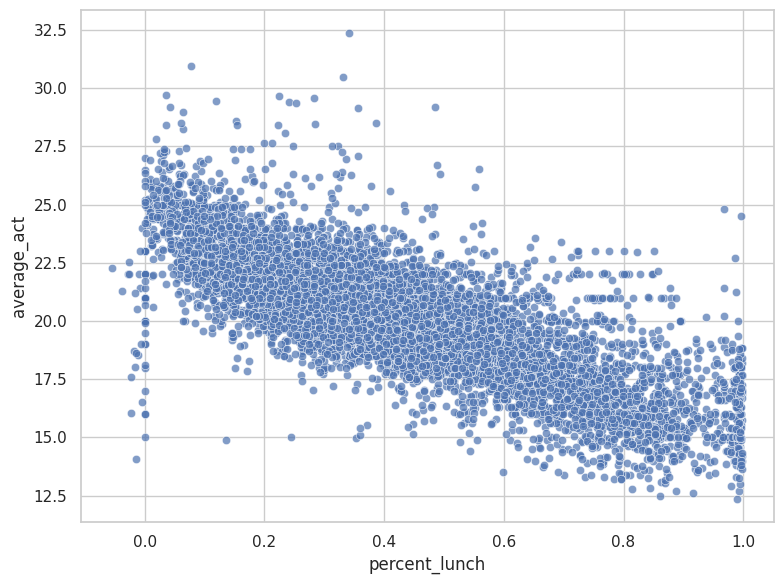

In [504]:
plt.figure(figsize=(8, 6))
sns.scatterplot(data=edgap, x='percent_lunch', y='average_act', alpha=0.7)
plt.tight_layout()
plt.show()

There don't appear to be many outliers if at all. It's reasonable for some schools to have 100% and some none.

## Identify missing values

Determine whether there are missing values in the data set.

In [505]:
# Count the number of NaN values in each column
nan_counts = df.isna().sum()

print(nan_counts)

id                    0
rate_unemployment    12
percent_college      11
percent_married      18
median_income        14
average_act           0
percent_lunch         0
year                  0
state                 0
zip_code              0
school_type           0
school_level          0
dtype: int64


In [506]:
df.shape

(7204, 12)

Looks like there are a few, all of which are the rates.

## Data imputation

Iterative imputer treats missing values as the target variable in it's modeling, we'll use this to fill in missing values in the main df

In [507]:
num_vars = ['rate_unemployment', 'percent_college', 'percent_married', 'median_income', 'average_act', 'percent_lunch']

# extract the selected numeric columns as the input data
X = df[num_vars]

# make a copy of the original DataFrame
df_mice = df.copy()

# initialize the IterativeImputer
imputer = IterativeImputer()

# fit the imputer on the input data and transform it
df_mice[num_vars] = imputer.fit_transform(X)

df_mice

,id,rate_unemployment,percent_college,percent_married,median_income,average_act,percent_lunch,year,state,zip_code,school_type,school_level
0,100001600143,0.117962,0.445283,0.346495,42820.0,20.433455,0.066901,2016-2017,DE,19804,Regular School,High
1,100008000024,0.063984,0.662765,0.767619,89320.0,19.498168,0.112412,2016-2017,DE,19709,Regular School,High
2,100008000225,0.056460,0.701864,0.713090,84140.0,19.554335,0.096816,2016-2017,DE,19709,Regular School,High
3,100017000029,0.044739,0.692062,0.641283,56500.0,17.737485,0.296960,2016-2017,DE,19958,Regular School,High
4,100018000040,0.077014,0.640060,0.834402,54015.0,18.245421,0.262641,2016-2017,DE,19934,Regular School,High
...,...,...,...,...,...,...,...,...,...,...,...,...
7978,560530200294,0.034549,0.590780,0.720077,64891.0,18.500000,0.232156,2016-2017,WY,82902,Regular School,High
7979,560569000311,0.069538,0.633860,0.808841,44603.0,22.300000,0.083871,2016-2017,WY,82833,Regular School,High
7980,560569500360,0.035159,0.764566,0.776570,44896.0,21.500000,0.184829,2016-2017,WY,82801,Regular School,High
7981,560576200324,0.063877,0.670532,0.879324,92134.0,19.700000,0.112583,2016-2017,WY,82935,Regular School,High


Apply to df

In [508]:
df = df_mice

,id,rate_unemployment,percent_college,percent_married,median_income,average_act,percent_lunch,year,state,zip_code,school_type,school_level
0,100001600143,0.117962,0.445283,0.346495,42820.0,20.433455,0.066901,2016-2017,DE,19804,Regular School,High
1,100008000024,0.063984,0.662765,0.767619,89320.0,19.498168,0.112412,2016-2017,DE,19709,Regular School,High
2,100008000225,0.056460,0.701864,0.713090,84140.0,19.554335,0.096816,2016-2017,DE,19709,Regular School,High
3,100017000029,0.044739,0.692062,0.641283,56500.0,17.737485,0.296960,2016-2017,DE,19958,Regular School,High
4,100018000040,0.077014,0.640060,0.834402,54015.0,18.245421,0.262641,2016-2017,DE,19934,Regular School,High
...,...,...,...,...,...,...,...,...,...,...,...,...
7978,560530200294,0.034549,0.590780,0.720077,64891.0,18.500000,0.232156,2016-2017,WY,82902,Regular School,High
7979,560569000311,0.069538,0.633860,0.808841,44603.0,22.300000,0.083871,2016-2017,WY,82833,Regular School,High
7980,560569500360,0.035159,0.764566,0.776570,44896.0,21.500000,0.184829,2016-2017,WY,82801,Regular School,High
7981,560576200324,0.063877,0.670532,0.879324,92134.0,19.700000,0.112583,2016-2017,WY,82935,Regular School,High


Now count the number of nan values

In [509]:
nan_counts = df.isna().sum()

print(nan_counts)

id                   0
rate_unemployment    0
percent_college      0
percent_married      0
median_income        0
average_act          0
percent_lunch        0
year                 0
state                0
zip_code             0
school_type          0
school_level         0
dtype: int64


## Train test split

We will use the test set approach to compare models predicting `average_act`.

![](https://upload.wikimedia.org/wikipedia/commons/thumb/b/bb/ML_dataset_training_validation_test_sets.png/800px-ML_dataset_training_validation_test_sets.png)

Split the data into training and testing sets. Keep 20% of the data for the test set.

In [510]:
# choosing feature and target variables
features = ['rate_unemployment', 'percent_college', 'percent_married', 'median_income', 'percent_lunch']
target = 'average_act'

# Splitting the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(df[features], df[target], test_size=0.2, random_state=42)

print(X_train.shape)
print(X_test.shape)

(5763, 5)
(1441, 5)


Looks good

## Create relevant derived variables as new columns

Will return to this step after further analysis

## Export the clean .csv files

Export files with the training and testing data

In [511]:
X_train.to_csv("train.csv", index=False)
X_test.to_csv("test.csv", index=False)